## Find the percent deviation from linearity in energy calibration
    - See Figure 12.30 in Knoll

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create dictionary of strips: {key=strip,value=[ [list of ADCs,list of true keV peaks], [model coeffs] ]}

def create_dictionary(file):
    file_object = open(str(file),"r")
    lines = file_object.readlines()
    d = {}
    
    for line in lines:
        if line.startswith("CP"):
            if int(line.split()[6]) > 0:
                det = line.split()[2]
                strip = line.split()[3]
                side = line.split()[4] 

                key = det+" "+strip+" "+side
                ADC = [float(i) for i in line.split()[7::3]]
                energy = [float(i) for i in line.split()[8::3]]

                d.update({key:[ADC,energy]})

        if line.startswith("CM"):
            if key in line:
                model = [float(x) for x in line.split()[6:]]
                max_num_coeffs = 5
                if len(model) < max_num_coeffs:
                    model.extend([0]*(max_num_coeffs - len(model)))

                if len(model) > max_num_coeffs:
                    print("You're using a calibration model with more than 5 coefficients. Code isn't updated for that yet. Sorry.")

                d[key] = [d[key],model]
    
    # Remove strips from analysis that didn't have both CP and CM data
    for key in d.copy():
        if len(d[key]) != 2:  
            del(d[key])
            
    return d

In [3]:
# Calculate the energy predicted by the polynomial model for a given list of ADC values
def model_energy_f(ADC,coeffs):
    model_energy = []   
    
    if len(coeffs) > 5:
         print("You're using a calibration model of order greater than poly4...code isn't updated for that yet. Sorry.")
        
    for i in ADC:    
        model_energy.append(coeffs[0] + coeffs[1]*i + coeffs[2]*i**2 + coeffs[3]*i**3 + coeffs[4]*i**4)
    
    return model_energy

In [4]:
def percent_dev(d,key):
    coeffs = d[key][1]
    ADCs = d[key][0][0]
    true_keV = np.array(d[key][0][1])

    model_keV = np.array(model_energy_f(ADCs,coeffs))

    residual_keV = np.array(model_keV - true_keV)
    percent_dev = 100.*np.divide( (model_keV - true_keV) , model_keV )
    
    return [ADCs,residual_keV,percent_dev]

### COSI Wanaka 2020

In [5]:
d_cosi_poly1 = create_dictionary("ecal_Wanaka2020_det0_poly1.ecal")

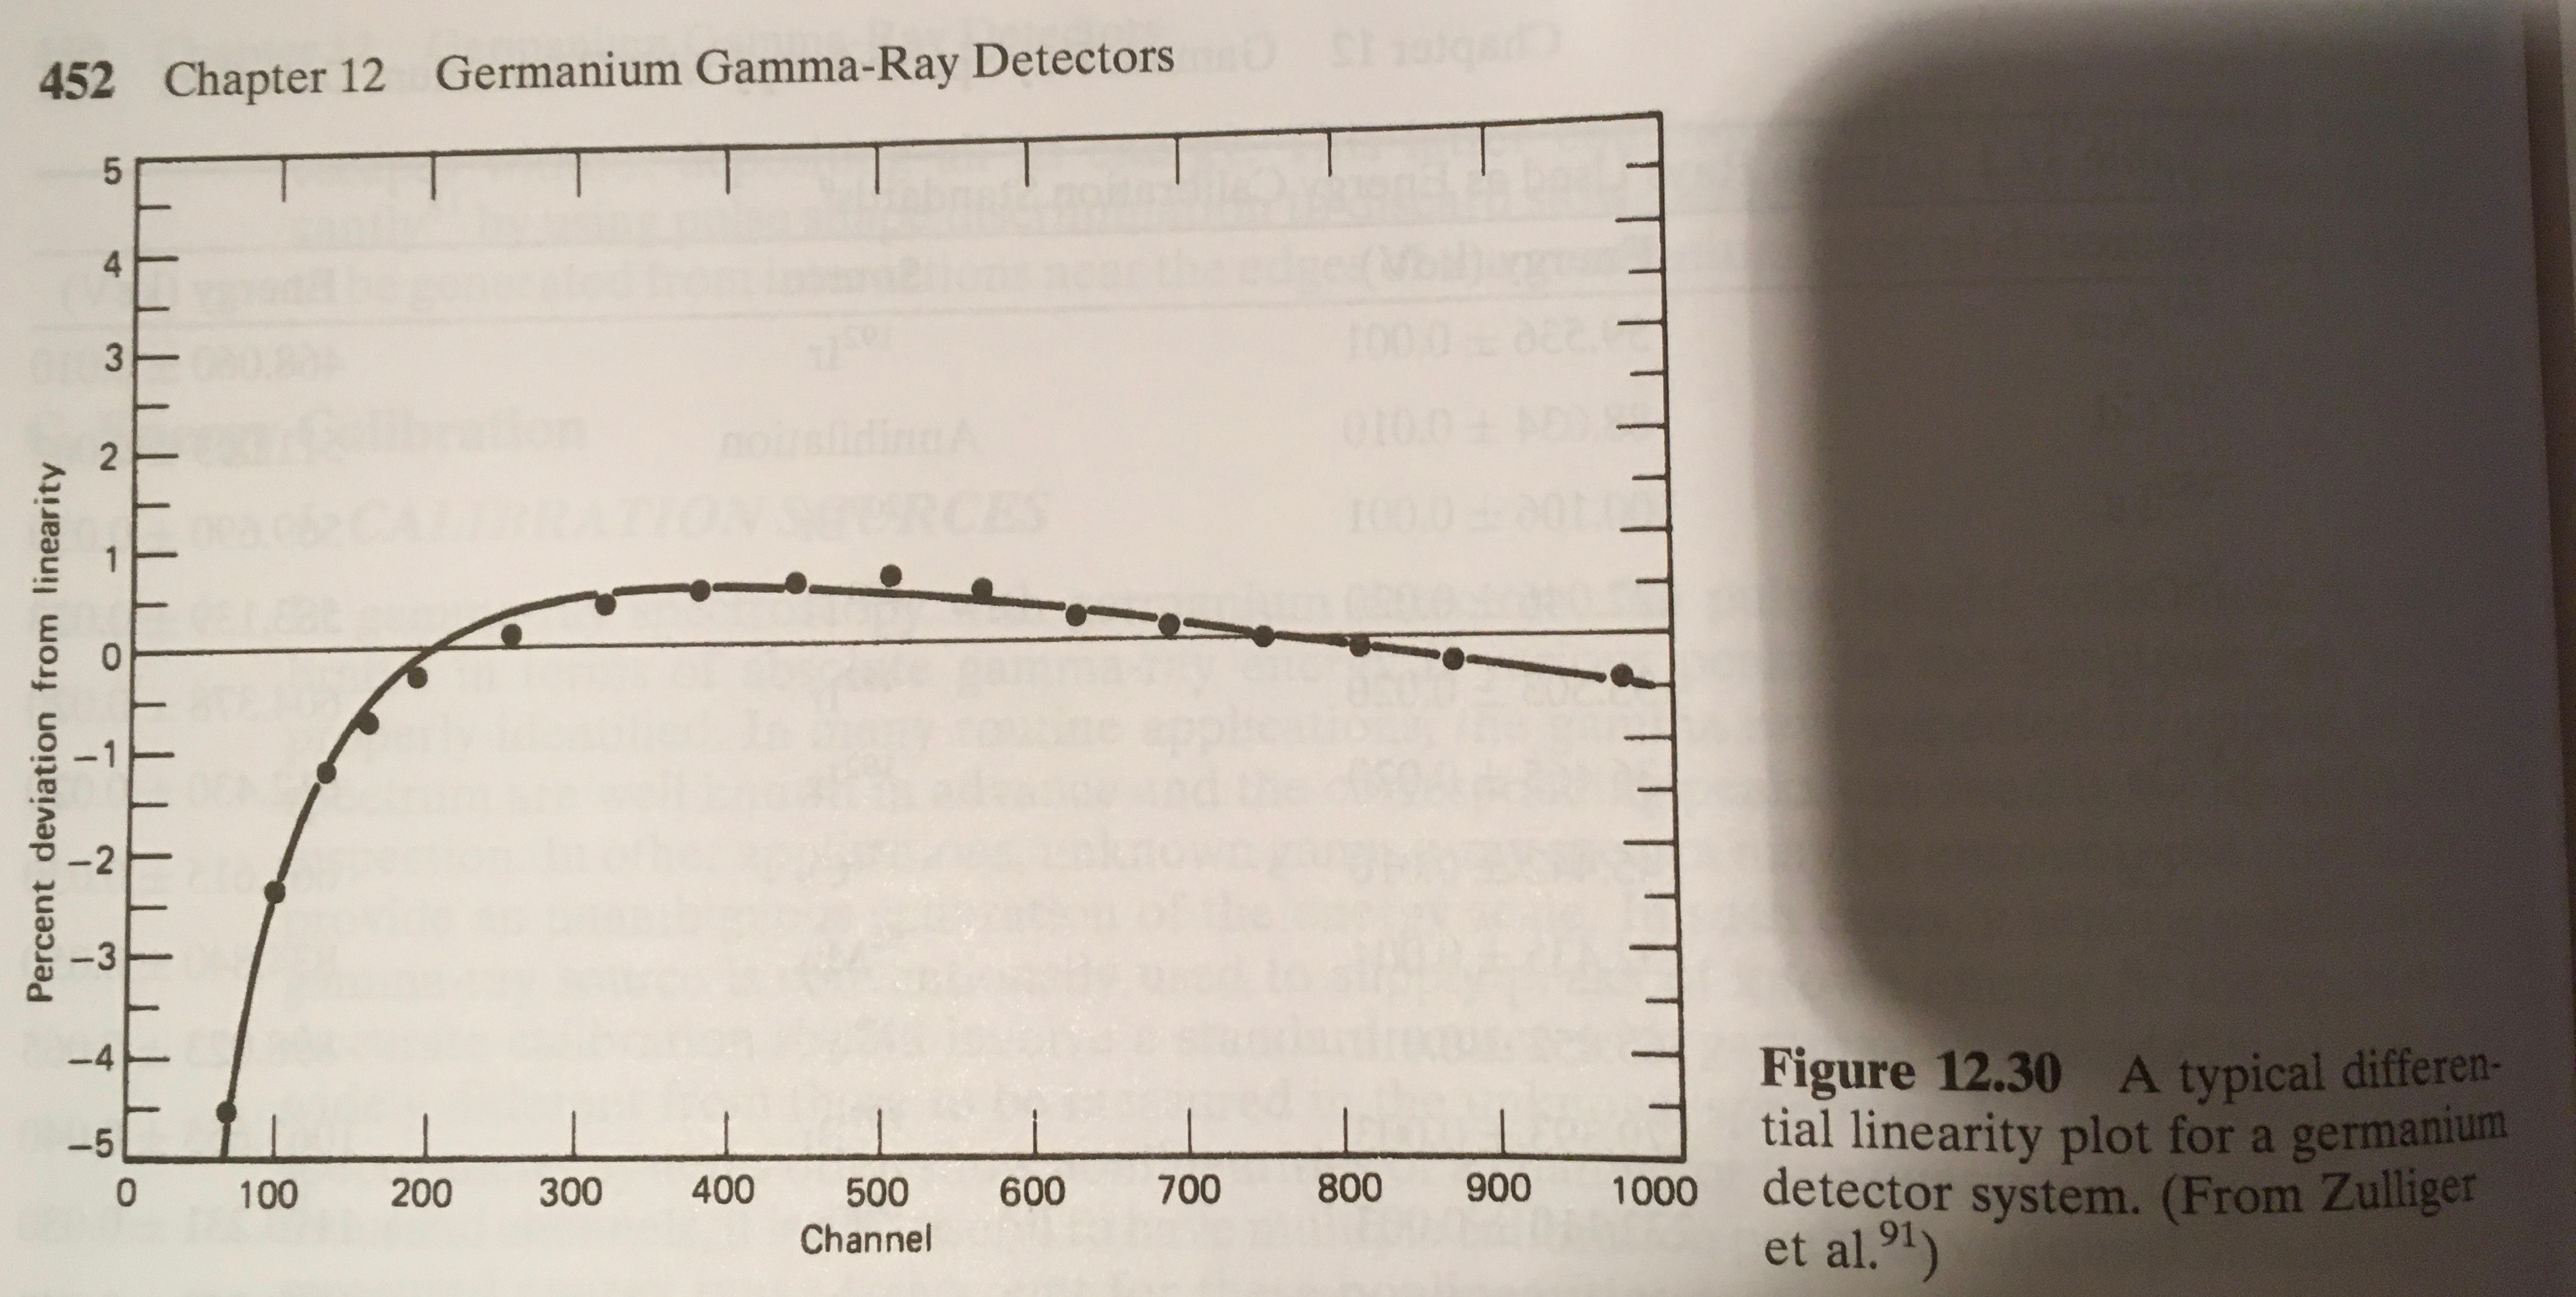

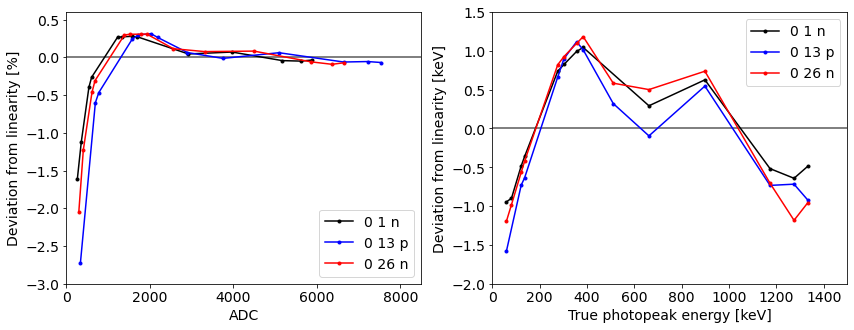

In [42]:
fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(14,5))

colors = ['k', 'b', 'r']

i = 0
for key in list(d_cosi_poly1.keys())[::25]:
    
    ADCs_poly1 = percent_dev(d_cosi_poly1, key)[0]
    residuals_poly1 = percent_dev(d_cosi_poly1, key)[1]
    percent_dev_poly1 = percent_dev(d_cosi_poly1, key)[2]

    ax1.plot(ADCs_poly1, percent_dev_poly1,'.-', label=key, color=colors[i])
    #ax1.plot(true_keV, percent_dev_poly1,'.-', label=key, color=colors[i])
    #ax1.set_ylabel('100*(model keV - true keV) / model keV'); ax1.set_xlabel('Channel')
    ax1.set_ylabel("Deviation from linearity [%]", fontsize=14)# (from melinator's poly1)")
    ax1.set_xlabel('ADC', fontsize=14)
    ax1.legend(loc='best', fontsize=14)
    ax1.set_xlim(0, 8500)
    ax1.set_ylim(bottom=-3, top=0.6)
    #ax1.set_yticks([-3.0,-2.5,-2.,-1.5,-1.,0,0.2,0.3])
    ax1.tick_params(axis='both', labelsize=14)
    ax1.hlines(y=0.00, xmin=0, xmax=8500, colors='gray')
    
    true_keV = np.array(d_cosi_poly1[key][0][1])
    ax2.plot(true_keV, residuals_poly1, '.-', label=key, color=colors[i])
    #ax2.set_ylabel("Linear model prediction - true photopeak energy [keV]")
    ax2.set_ylabel("Deviation from linearity [keV]", fontsize=14)
    ax2.set_xlabel('True photopeak energy [keV]', fontsize=14)
    #ax2.set_title("Residual from linear model")
    ax2.legend(loc='best', fontsize=14)
    ax2.set_xlim(0, 1500) 
    ax2.set_ylim(bottom=-2, top=1.5)
    ax2.tick_params(axis='both', labelsize=14)
    ax2.hlines(y=0.00, xmin=0, xmax=1500, colors='gray')
    
    i += 1

#plt.savefig('deviation_from_linearity_Wanaka2020_det0_poly1.pdf')

# knoll figure
from IPython.display import Image
Image("Knoll_Fig12.30.png", width = 500, height = 300)

Text(0.5, 1.0, 'Strip 0 29 p')

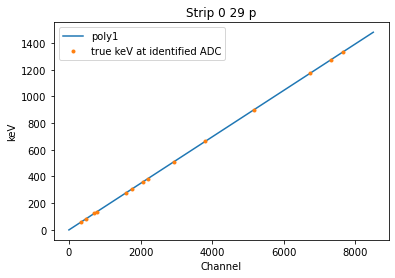

In [25]:
channels = np.arange(0,8500,1)
coeffs = d_cosi_poly1[key][1]
true_keV = d_cosi_poly1[key][0][1]
ADCs = percent_dev(d_cosi_poly1,key)[0]
model_all_keV = model_energy_f(channels,coeffs)
plt.plot(channels,model_all_keV,label='poly1')
plt.plot(ADCs,true_keV,'.',label='true keV at identified ADC')
plt.ylabel('keV');plt.xlabel('Channel');plt.legend(loc='best');plt.title('Strip '+key)

### NRL1v2B ASIC 0

In [26]:
d_asic_poly1 = create_dictionary("am_bar_cs_1us_18.4mVfC_201009_NRL1v2B_ASIC0_poly1.ecal")

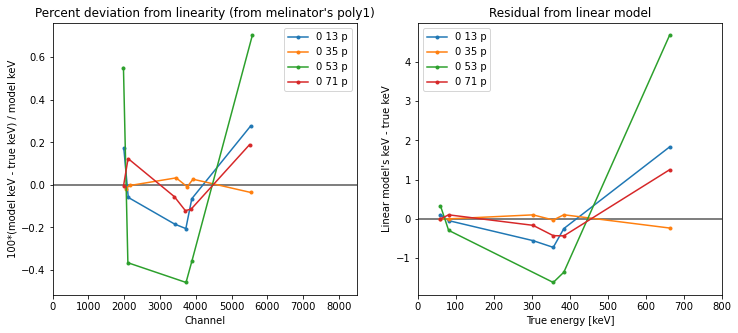

In [27]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
for key in list(d_asic_poly1.keys())[::9]:
    ADCs_poly1 = percent_dev(d_asic_poly1,key)[0]
    residuals_poly1 = percent_dev(d_asic_poly1,key)[1]
    percent_dev_poly1 = percent_dev(d_asic_poly1,key)[2]

    ax1.plot(ADCs_poly1,percent_dev_poly1,'.-',label=key)
    ax1.set_ylabel('100*(model keV - true keV) / model keV'); ax1.set_xlabel('Channel')
    ax1.set_title("Percent deviation from linearity (from melinator's poly1)")
    ax1.legend(loc='best')
    ax1.set_xlim(0,8500)
    ax1.hlines(y=0.00,xmin=0,xmax=8500,colors='gray')
    
    true_keV = np.array(d_asic_poly1[key][0][1])
    ax2.plot(true_keV,residuals_poly1,'.-',label=key)
    ax2.set_ylabel("Linear model's keV - true keV"); ax2.set_xlabel('True energy [keV]')
    ax2.set_title("Residual from linear model")
    ax2.legend(loc='best')
    ax2.set_xlim(0,800); 
    ax2.hlines(y=0.00,xmin=0,xmax=800,colors='gray')

### COSI 2016 Wanaka: Check if temperature is causing non-linearities
#### melinator -c Det11_Melinator_041818.cfg -d 11 -t 32 32.5
The above config file was in /volumes/cronus/users/carolyn/Analysis/Calibrations_COSI2016/EnergyCalibration

In [28]:
d_cosi2016_poly1 = create_dictionary("Det11_Melinator_041818_32-32.5C_poly1.ecal")

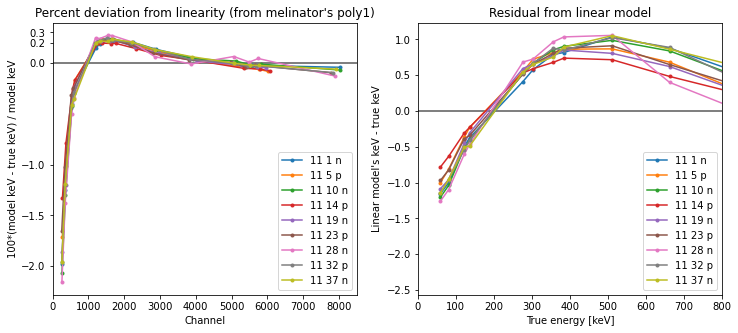

In [29]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
for key in list(d_cosi2016_poly1.keys())[::9]:
    ADCs_poly1 = percent_dev(d_cosi2016_poly1,key)[0]
    residuals_poly1 = percent_dev(d_cosi2016_poly1,key)[1]
    percent_dev_poly1 = percent_dev(d_cosi2016_poly1,key)[2]

    ax1.plot(ADCs_poly1,percent_dev_poly1,'.-',label=key)
    ax1.set_ylabel('100*(model keV - true keV) / model keV'); ax1.set_xlabel('Channel')
    ax1.set_title("Percent deviation from linearity (from melinator's poly1)")
    ax1.legend(loc='best')
    ax1.set_xlim(0,8500)
    ax1.set_yticks([-3.0,-2.5,-2.,-1.5,-1.,0,0.2,0.3])
    ax1.hlines(y=0.00,xmin=0,xmax=8500,colors='gray')
    
    true_keV = np.array(d_cosi2016_poly1[key][0][1])
    ax2.plot(true_keV,residuals_poly1,'.-',label=key)
    ax2.set_ylabel("Linear model's keV - true keV"); ax2.set_xlabel('True energy [keV]')
    ax2.set_title("Residual from linear model")
    ax2.legend(loc='best')
    ax2.set_xlim(0,800); 
    ax2.hlines(y=0.00,xmin=0,xmax=800,colors='gray')